#### Exercise 1
<!-- @q -->

1. What kinds of EDA techniques might you use to explore the following types of data:
    - Numeric data?  
    - Categorical data?  
    - The relationship between categorical and numeric data?

For numeric, comtinuous data, you can do descriptive analysis (mean, median, variance, min/max);Histograms / density plots; Boxplots(detecting outliers); Correlation heatmaps, etc. 
For categorical, discrete data, you can do frequency analysis (counts of each categories); bar plot; chi-square test, etc.
In machine learning, many real-world datasets contain both categorical variables (e.g., gender, product type, region) and numeric variables (e.g., income, age, purchase amount). Whether the variables are categorical or numerical, and whether they are the independent or outcome variables, play a role in deciding the modeling we are going to use in later phase. In addition, understanding category–numeric relationships in advance helps decide which encoding strategy is most appropriate. For example, if a numeric variable changes smoothly across ordered categories (e.g., “education level”), ordinal encoding may be more suitable than one-hot encoding. 

2. Generate some fake data (~1000 rows) with 1 categorical column (with 10 categories) and 2 numeric columns. Use the techniques you mentioned to explore the numeric, categorical, and the relationship between them.

                    count        mean        std        min        25%  \
monthly_sales_k    1000.0  115.392600  39.711892  24.181093  76.151610   
cust_satisfaction  1000.0   75.097571   5.136236  53.122622  72.150352   

                          50%         75%         max      skew  kurtosis  
monthly_sales_k    132.765827  147.944904  176.337010 -0.594977  -1.09316  
cust_satisfaction   75.026825   77.993113   99.966755  0.102842   1.73575  


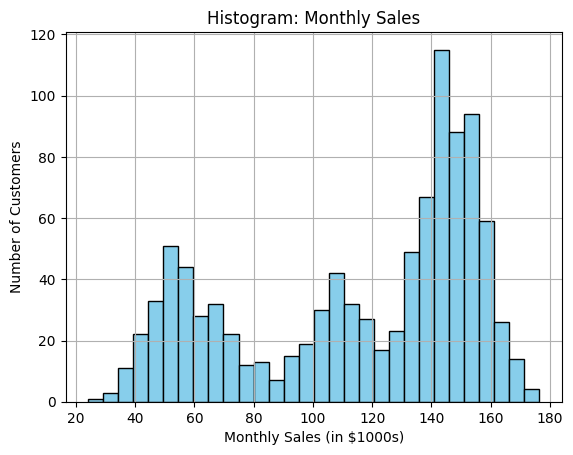

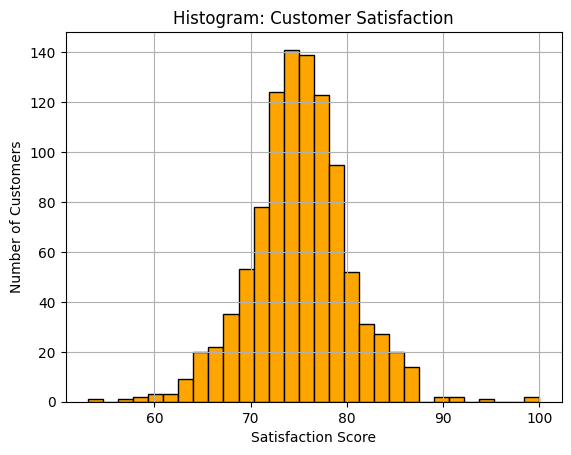

Correlation:
                    monthly_sales_k  cust_satisfaction
monthly_sales_k           1.000000           0.002305
cust_satisfaction         0.002305           1.000000


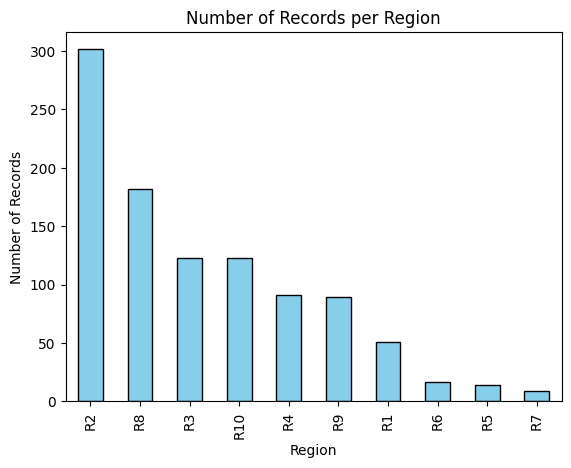

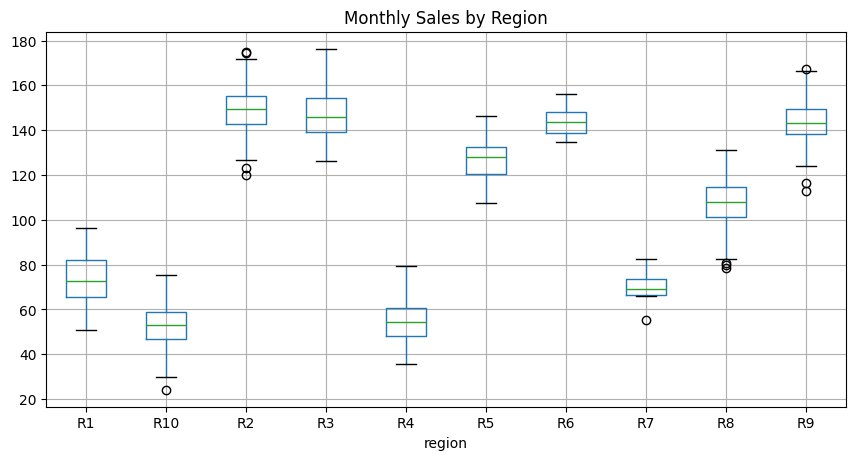

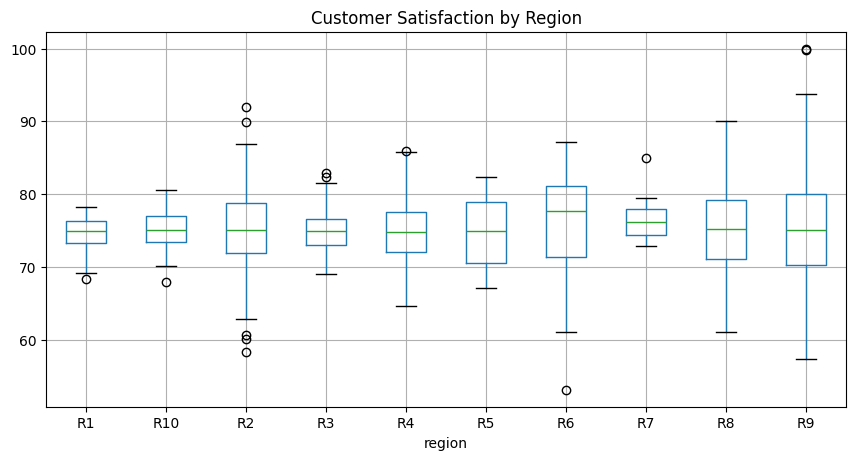

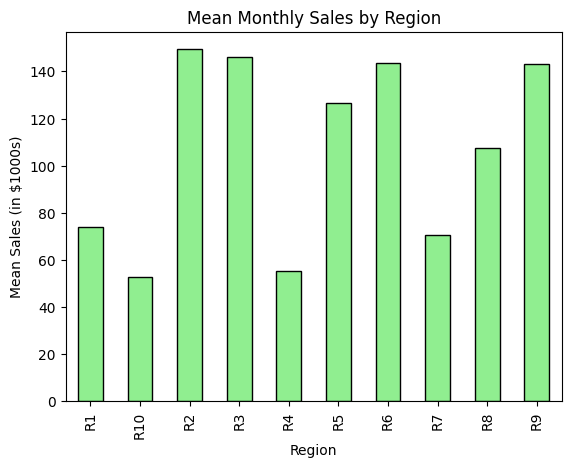

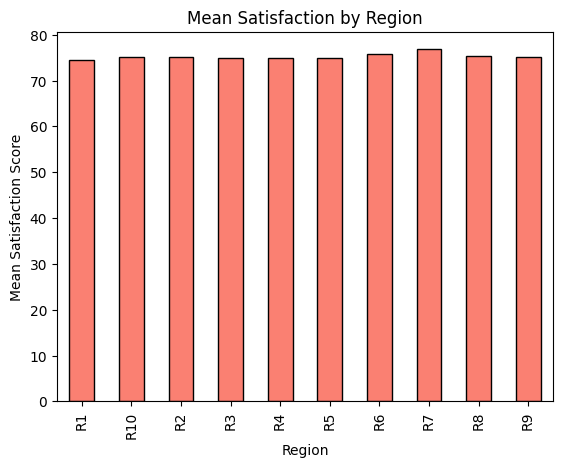

ANOVA (Sales across Regions): F=1672.27, p=0.000
ANOVA (Satisfaction across Regions): F=0.27, p=0.984


In [1]:
# Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

# ---- 1) Generate fake data ----
n = 1000
regions = [f"R{i}" for i in range(1, 11)]  # 10 regions
region = np.random.choice(regions, size=n, p=np.random.dirichlet(np.ones(10)))

# Monthly Sales (region-specific average sales with noise)
region_to_sales = {r: np.random.uniform(50, 150) for r in regions}
sales = np.array([np.random.normal(loc=region_to_sales[r], scale=10) for r in region])

# Customer Satisfaction (different variances across regions)
region_to_var = {r: np.random.uniform(2, 8) for r in regions}
satisfaction = np.array([np.random.normal(loc=75, scale=region_to_var[r]) for r in region])

df = pd.DataFrame({
    "region": region,
    "monthly_sales_k": sales,
    "cust_satisfaction": satisfaction
})

# ---- 2) Numeric EDA ----
# Summary stats + skew/kurtosis
desc_numeric = df[["monthly_sales_k", "cust_satisfaction"]].describe().T
desc_numeric["skew"] = df[["monthly_sales_k", "cust_satisfaction"]].skew()
desc_numeric["kurtosis"] = df[["monthly_sales_k", "cust_satisfaction"]].kurtosis()
print(desc_numeric)

# Histogram: Monthly Sales
df["monthly_sales_k"].hist(bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram: Monthly Sales")
plt.xlabel("Monthly Sales (in $1000s)")   # X-axis = sales value ranges
plt.ylabel("Number of Customers")         # Y-axis = frequency/count
plt.show()

# Histogram: Customer Satisfaction
df["cust_satisfaction"].hist(bins=30, color="orange", edgecolor="black")
plt.title("Histogram: Customer Satisfaction")
plt.xlabel("Satisfaction Score")          # X-axis = score values
plt.ylabel("Number of Customers")         # Y-axis = frequency/count
plt.show()

# Correlation
print("Correlation:\n", df[["monthly_sales_k", "cust_satisfaction"]].corr())

# ---- 3) Categorical EDA ----
# Frequency counts
freq_table = df["region"].value_counts().rename_axis("region").to_frame("count")
freq_table["proportion"] = freq_table["count"] / len(df)

# ---- Bar plot: Region counts ----
freq_table["count"].plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of Records per Region")
plt.xlabel("Region")           # X-axis = region labels
plt.ylabel("Number of Records") # Y-axis = frequency/count
plt.show()

# ---- 4) Relationship: Region ↔ Numeric ----
# Group stats
group_stats = (
    df.groupby("region")[["monthly_sales_k", "cust_satisfaction"]]
      .agg(["mean", "median", "std", "count"])
)

# Boxplots
df.boxplot(column="monthly_sales_k", by="region", figsize=(10,5))
plt.title("Monthly Sales by Region")
plt.suptitle("")
plt.show()

df.boxplot(column="cust_satisfaction", by="region", figsize=(10,5))
plt.title("Customer Satisfaction by Region")
plt.suptitle("")
plt.show()

# ---- Mean plots: Monthly Sales ----
df.groupby("region")["monthly_sales_k"].mean().plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Mean Monthly Sales by Region")
plt.xlabel("Region")           # X-axis = region labels
plt.ylabel("Mean Sales (in $1000s)") # Y-axis = average sales
plt.show()

# ---- Mean plots: Customer Satisfaction ----
df.groupby("region")["cust_satisfaction"].mean().plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Mean Satisfaction by Region")
plt.xlabel("Region")           # X-axis = region labels
plt.ylabel("Mean Satisfaction Score") # Y-axis = average score
plt.show()

# ---- 5) Statistical tests ----
groups_sales = [df.loc[df["region"] == r, "monthly_sales_k"] for r in regions]
groups_satis = [df.loc[df["region"] == r, "cust_satisfaction"] for r in regions]

anova_sales = stats.f_oneway(*groups_sales)
anova_satis = stats.f_oneway(*groups_satis)

# Print clean results with p-value rounded to 3 decimals
print(f"ANOVA (Sales across Regions): F={anova_sales.statistic:.2f}, p={anova_sales.pvalue:.3f}")
print(f"ANOVA (Satisfaction across Regions): F={anova_satis.statistic:.2f}, p={anova_satis.pvalue:.3f}")

#### Exercise 2


Generate a data set you can use with a supervised ML model.  The data should meet the following criteria:
   - It should have 1000 rows
   - It should have 6 columns, with one column (your "target" column being a boolean column), one categorical column with 5 categories, and 4 numeric columns.
   - The numeric columns should have dramatically different scales - different means, different std. deviations.
   - Each non-target column should have about 5% nulls.

Make this data a little more interesting by calculating the target column using a noisy function of the other columns.

In [2]:
# Your code here
import numpy as np
import pandas as pd
from scipy.special import expit as sigmoid

np.random.seed(123)

n = 1000

# ----- Real-life feature definitions -----
regions = np.array([f"R{i}" for i in range(1, 6)])
region = np.random.choice(regions, size=n, p=[0.15, 0.2, 0.25, 0.25, 0.15])

# complaint_z: more complaints => riskier (mean~0, sd~1)
complaint_z = np.random.normal(loc=0, scale=1, size=n)

# days_since_login: inactivity (mean~50, sd~15)
days_since_login = np.random.normal(loc=50, scale=15, size=n)

# downtime_minutes_ytd: very large scale (lognormal ~ tens of thousands)
downtime_minutes_ytd = np.random.lognormal(mean=10, sigma=0.25, size=n)

# monthly_active_minutes: engagement (mean~5000, sd~1200)
monthly_active_minutes = np.random.normal(loc=5000, scale=1200, size=n)

# ----- Build target from standardized combo + region effects -----
def z(x):
    return (x - x.mean()) / x.std()

z_complaint  = z(complaint_z)
z_inactivity = z(days_since_login)
z_downtime   = z(downtime_minutes_ytd)
z_engage     = z(monthly_active_minutes)

region_effects = {"R1": -0.4, "R2": 0.1, "R3": 0.3, "R4": -0.1, "R5": 0.2}
eff = np.vectorize(region_effects.get)(region)

# Linear risk score + noise; logistic -> probability; Bernoulli -> boolean target
score = (1.2 * z_complaint) + (0.6 * z_inactivity) + (0.9 * z_downtime) - (0.4 * z_engage) \
        + eff + np.random.normal(0, 0.5, size=n)
p = sigmoid(score)
at_risk = (np.random.rand(n) < p)

# Assemble DataFrame
df = pd.DataFrame({
    "region": region,
    "complaint_z": complaint_z,
    "days_since_login": days_since_login,
    "downtime_minutes_ytd": downtime_minutes_ytd,
    "monthly_active_minutes": monthly_active_minutes,
    "at_risk": at_risk.astype(bool)
})

# Inject ~5% nulls into each non-target column
rng = np.random.default_rng(999)
for col in ["region", "complaint_z", "days_since_login", "downtime_minutes_ytd", "monthly_active_minutes"]:
    mask = rng.random(n) < 0.05
    df.loc[mask, col] = np.nan

# Optional: save
df.to_csv("customer_risk_dataset.csv", index=False)


#### Exercise 3

Use whatever resources you need to figure out how to build an SKLearn ML pipelines. Use a pipeline to build an ML approach to predicting your target column in the preceding data with logistic regression.  I have set up the problem below so that you will write your code in a function function call that takes an SKLearn model and data frame and returns the results of a cross validation scoring routine.  

I have not taught you how to do this; use the book, google, the notes, chatgpt, or whatever. This is a test of your ability to *find* information, and use this to construct a solution. Your solution should:

- Use a transformer pipeline that processes your numeric and categorical features separately
- Place everything in a pipeline with the classifier that is passed in to the function.
- I've already implemented the call to cross_val_score - to make it work, you'll need to assign your pipeline to the `pipeline` variable.

_Note: You could just feed this question to AI and get an answer, and chances are, it will be right. But if you do, you won't really learn much. So, be thoughtful in your use of AI here - you can use it to build the solution step by step, and it will explain how everything works. It's all in how you use it. So, it's your choice - go for the easy grade, or learn something._

In [3]:
# --- Imports
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 1) Load your dataset
df = pd.read_csv("customer_risk_dataset.csv")

def run_classifier(df,classifier, target ="at_risk"):
    # Separate features/target
    y = df[target].astype(int)  # logistic expects numeric; 0/1 from boolean
    X = df.drop(columns=[target])

 # Identify column types
    numeric_features = X.select_dtypes(include=["number"]).columns.tolist()
    categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

    # Pipelines for each type
    numeric_prep = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ])
    categorical_prep = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
        # (sparse_output=False) for newer sklearn; omit for compatibility
    ])

    # Column-wise transformer
    preprocess = ColumnTransformer(transformers=[
        ("num", numeric_prep, numeric_features),
        ("cat", categorical_prep, categorical_features),
    ], remainder="drop")

 # Full pipeline with the provided classifier
    pipeline = Pipeline(steps=[
        ("prep", preprocess),
        ("clf", classifier)
    ])
    # --- 5-fold CV using F1 (stratified for classification) ---
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    return cross_val_score(pipeline, X, y, scoring="f1", cv=cv, n_jobs=-1)
target = "at_risk"    
scores = run_classifier(df, LogisticRegression(max_iter=1000, random_state=42), target)
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))



F1 (5-fold): mean=0.750, std=0.020
Fold scores: [0.773 0.751 0.77  0.723 0.732]


Try using a `RandomForestClassifier` in the preceding pipeline. Just call `run_classifier` with a `RandomForestClassifier`, and print out the results as above.

In [4]:
# Your code here
from sklearn.ensemble import RandomForestClassifier

# Call your existing run_classifier (defined earlier)
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

scores = run_classifier(df, rf)
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))


F1 (5-fold): mean=0.763, std=0.024
Fold scores: [0.8   0.75  0.782 0.736 0.746]


Normally, `RandomForestClassifier`s are considered to be more powerful than `LogisticRegression`.  Depending on your data, this may or may not be the case. Reflect on your answers - which one does better here, and why do you think that is?  Once again, you might use AI, but you should probably also try to _understand_ the answer.

The RandomForestClassifier gave a slightly better mean F1 score, and this improvement was consistent across folds. This makes sense because the target column (at_risk) doesn’t seem to have a simple linear relationship with the input features. Logistic regression is a linear model, so it struggles when the patterns are more complex or noisy. Random forests, on the other hand, combine many decision trees and can capture more flexible, nonlinear relationships in the data.

In addition, the numeric features in the dataset are also quite varied and may include outliers. Logistic regression is sensitive to scaling and can be influenced by extreme values, even after standardization. Random forests use threshold-based splits, so they are less affected by outliers.

However, since the dataset is fairly large and only about 5% of the data is missing (which is easy to handle with imputation), the overall results from both models end up being quite similar.